**Short prompt:**
Bright modern minimalist apartment with floor-to-ceiling windows, natural light, neutral palette, clean lines, and subtle luxury details.
**Budget:**
Mid–high budget ($80k–$120k total renovation and furnishing).
**Style preset:**
Modern minimalist, Scandinavian influence, warm minimalism.
**Apartment layout:**
Open-plan living room + kitchen, 1 bedroom, 1 bathroom, small balcony, ceiling height 2.8m.


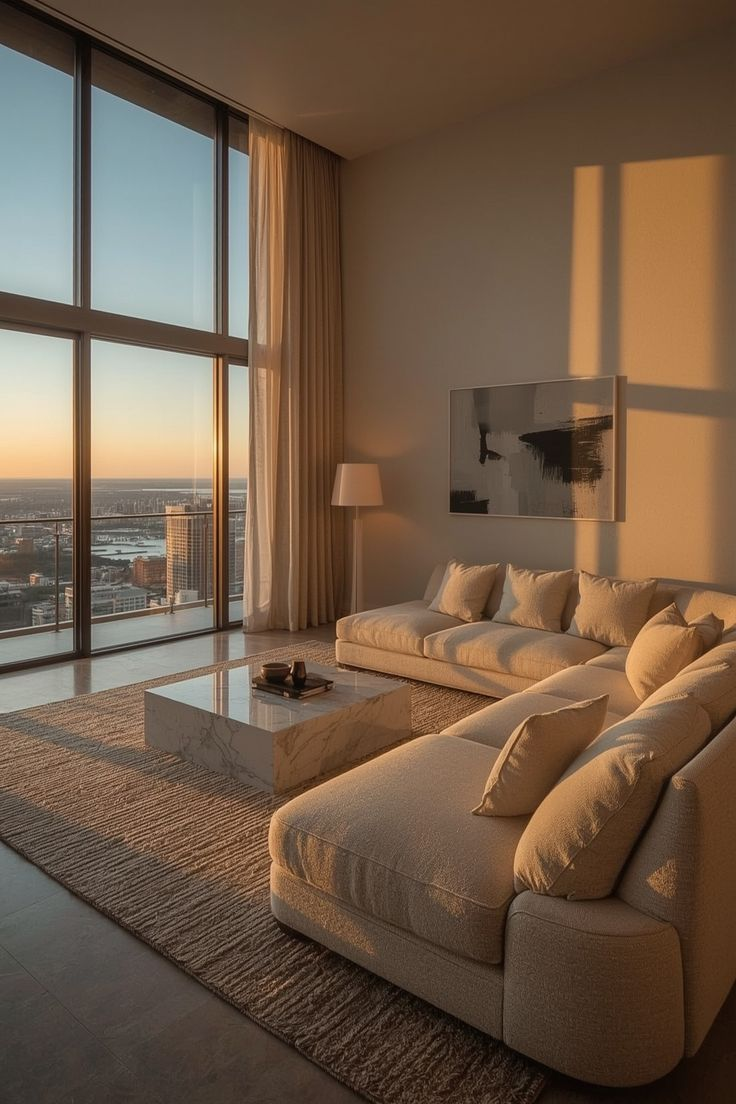

In [1]:
from pathlib import Path
from PIL import Image

PROMPT_VERSION = 1
TASK_NAME = "1_modern_minimalist"
IMG_FILENAME = "image.png"
PROMPT_FILENAME = f"prompt_v{PROMPT_VERSION}.md"
DATASET_PATH = Path(f"dataset/{TASK_NAME}")
IMG_PATH = DATASET_PATH / IMG_FILENAME
PROMPT_PATH = DATASET_PATH / PROMPT_FILENAME

user_prompt = PROMPT_PATH.read_text(encoding="utf-8")
print(user_prompt)
Image.open(IMG_PATH)

In [ ]:
import base64
from io import BytesIO
from langchain_openai import ChatOpenAI
from openai import AsyncClient
from settings import settings
from langchain.messages import SystemMessage, HumanMessage

IMG_GEN_PROMPT_PATH = Path("prompts/img_gen.jinja")

client = AsyncClient(
    api_key=settings.OPENROUTER_API_KEY, 
    base_url=settings.OPENROUTER_BASE_URL, 
)

def img_to_url(img_path: Path) -> str:
    """Get Base64 Data URL of image by img_path."""
    img = Image.open(img_path)
    buffer = BytesIO()
    suffix = img_path.suffix[1:]
    img.save(buffer, format=suffix.capitalize(), quality=30)
    img_b64 = base64.b64encode(buffer.getvalue()).decode("utf-8")
    return f"data:image/{suffix};base64,{img_b64}"

prompt = IMG_GEN_PROMPT_PATH.read_text(encoding="utf-8")
img_url = img_to_url(IMG_PATH)
messages = [
    {"role": "system", "content": prompt},
    {"role": "user", "content": [
        {"type": "text", "text": user_prompt},
        {
            "type": "image_url", 
            "image_url": {"url": img_url}
        }
    ]}
]

response = client.images.edit(
    model="gpt-5-image",
    prompt=f"{prompt}\n{user_prompt}",
    image=open(IMG_GEN_PROMPT_PATH, "rb"),
)

In [ ]:
image_base64 = response.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

with open("output_image", "wb") as f:
    f.write(image_bytes)